In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import os


In [2]:
los_df = pd.read_csv("gnss_data/LOS DATA.xlsx - Sheet1.csv")
nlos_df = pd.read_csv("gnss_data/NLOS DATA.xlsx - Sheet1.csv")

los_df["Label"] = 0  
nlos_df["Label"] = 1


In [3]:
los_df.drop(columns=["PRN"], inplace=True, errors='ignore')
nlos_df.drop(columns=["PRN"], inplace=True, errors='ignore')

df = pd.concat([los_df, nlos_df])


In [4]:
X = df.drop(columns=["Label"])
y = df["Label"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')

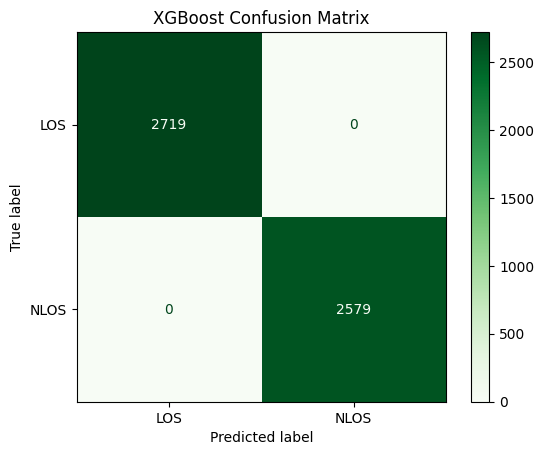

In [9]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["LOS", "NLOS"])
disp.plot(cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()

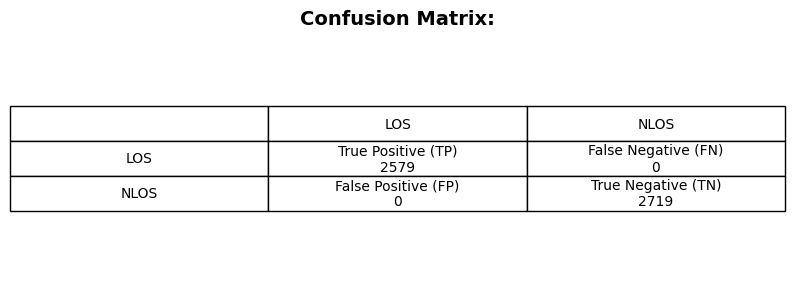

   Metric  Value
Precision    1.0
   Recall    1.0
 F1 Score    1.0
 Accuracy    1.0


In [10]:
#Confusion Matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

cell_text = [
    ["", "LOS", "NLOS"],
    ["LOS", f"True Positive (TP)\n{tp}", f"False Negative (FN)\n{fn}"],
    ["NLOS", f"False Positive (FP)\n{fp}", f"True Negative (TN)\n{tn}"]
]


fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
ax.set_title("Confusion Matrix:", fontweight='bold', fontsize=14, pad=10)

table = ax.table(
    cellText=cell_text,
    loc='center',
    cellLoc='center'
)

table.scale(1.2, 2)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

# Performance Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
})
print(metrics_df.to_string(index=False))


In [11]:
download_dir = os.path.join(os.path.expanduser("~"), "Downloads", "GNSS_PROJECT")
os.makedirs(download_dir, exist_ok=True)

csv_path = os.path.join(download_dir, "combined_metrics.csv")

confusion_df = pd.DataFrame({
    'Metric': ['True Positive (TP)', 'False Negative (FN)', 'False Positive (FP)', 'True Negative (TN)'],
    'Value': [tp, fn, fp, tn]
})

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
})

with open(csv_path, 'w', newline='') as f:
    f.write("Confusion Matrix Values\n")
    confusion_df.to_csv(f, index=False)
    f.write("\n")  # blank line
    f.write("Performance Metrics\n")
    metrics_df.to_csv(f, index=False)


print(f"✅ Metrics saved to: {csv_path}")


✅ Metrics saved to: C:\Users\jaswa\Downloads\GNSS_PROJECT\combined_metrics.csv
